In [163]:
#Kütüphaneleri içe aktarma

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.linear_model import LogisticRegression


# label_num = 0 Spam değil demektir.
# label_num = 1 Spam demektir.
df = pd.read_csv("spam_ham_dataset.csv")
df.head()



,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [164]:
df['label'] [:] #label sütunundaki veriler

0        ham
1        ham
2        ham
3       spam
4        ham
        ... 
5166     ham
5167     ham
5168     ham
5169     ham
5170    spam
Name: label, Length: 5171, dtype: object

In [165]:
df.describe() #

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [166]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [167]:
df.shape

(5171, 4)

In [168]:
df.value_counts('label_num')

label_num
0    3672
1    1499
dtype: int64

In [169]:
df.value_counts('Unnamed: 0')

Unnamed: 0
0       1
3474    1
3452    1
3451    1
3450    1
       ..
1722    1
1721    1
1720    1
1719    1
5170    1
Length: 5171, dtype: int64

In [170]:
len(df)

5171

In [171]:
len(df["text"]) #metinsel mesaj (tablodaki text sayısı)

5171

In [172]:
ham = df[df['label_num'] == 0] #sadece ham olanları listeledik

In [173]:
ham

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
...,...,...,...,...
5165,2849,ham,"Subject: fw : crosstex energy , driscoll ranch...",0
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0


In [174]:
spam = df[df['label_num']==1] #sadece spam olanları listeler..

In [175]:
spam

,Unnamed: 0,label,text,label_num
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
10,4922,spam,Subject: vocable % rnd - word asceticism\r\nvc...,1
11,3799,spam,Subject: report 01405 !\r\nwffur attion brom e...,1
13,3948,spam,Subject: vic . odin n ^ ow\r\nberne hotbox car...,1
...,...,...,...,...
5159,4381,spam,Subject: pictures\r\nstreamlined denizen ajar ...,1
5161,4979,spam,Subject: penny stocks are about timing\r\nnoma...,1
5162,4162,spam,Subject: anomaly boys from 3881\r\nuosda apapr...,1
5164,4365,spam,Subject: slutty milf wants to meet you\r\ntake...,1


In [176]:
print(f' Ham ve spam olarak sınıflandırılan toplam {df.shape[0]}  E-Postadan oluşan veri seti')




 Ham ve spam olarak sınıflandırılan toplam 5171  E-Postadan oluşan veri seti


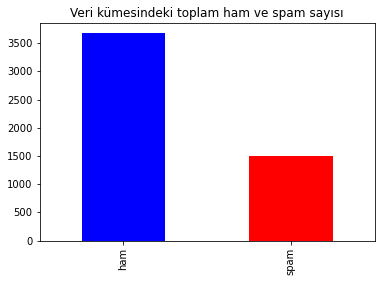

In [177]:

df['label'].value_counts().plot.bar(color = ["b","r"])
plt.title('Veri kümesindeki toplam ham ve spam sayısı') 

plt.show() 

In [178]:
#verisetinin temizlenmesi
def preprocess(text):
    text = text.replace('\r',' ')
    text = text.replace('\n',' ')
    text = text.replace('#',' ')
    text = text.replace("we ' re","we are")
    text = text.replace("they ' re","they are")
    text = text.replace("you ' re","you are")
    text = text.replace("Subject:"," ")

    return text

In [179]:
df['text_clean']=df['text'].map(preprocess)


In [180]:
df.head(4993)  #sonunda metni düzenleyip dönüştürüyoruz..

,Unnamed: 0,label,text,label_num,text_clean
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol ; meter : 988291 this is a...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"hpl nom for january 9 , 2001 ( see attached..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"neon retreat ho ho ho , we are around to th..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,"photoshop , windows , office . cheap . main ..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,re : indian springs this deal is to book th...
...,...,...,...,...,...
4988,1542,ham,Subject: re : oasis pipe line company\r\njust ...,0,"re : oasis pipe line company just a note , ..."
4989,2891,ham,Subject: aep - hpl transition issues\r\nattach...,0,aep - hpl transition issues attached is a u...
4990,2157,ham,Subject: nom change for the 5 th\r\n- - - - - ...,0,nom change for the 5 th - - - - - - - - - -...
4991,449,ham,Subject: address change - - ken seaman\r\nnew ...,0,address change - - ken seaman new address f...


In [181]:
#Verileri train_set ve test_set olarak ayırma

In [182]:
vectorizer = CountVectorizer()
spam_ham = vectorizer.fit_transform(df['text'])
print(spam_ham.toarray())


[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [183]:
spam_ham.shape

(5171, 50447)

In [184]:
X= spam_ham

In [185]:
Y= df['label_num'].values

In [186]:
print(Y)

[0 0 0 ... 0 0 1]


In [187]:

X_train , X_test , Y_train , Y_test =train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [188]:
#NAIVE_BAYES algoritması ile modelin eğitilmesi
NB_classifier =MultinomialNB() #çok terimli naive bayes sınıflandırıcısı
NB_classifier.fit(X_train , Y_train)

MultinomialNB()

In [189]:
#Training_set sonucunu tahmin etme
Y_pred_train = NB_classifier.predict(X_train)
print(Y_pred_train)

[0 0 0 ... 1 0 0]


In [190]:
#Test_set sonucunu tahmin Etme
Y_pred_test = NB_classifier.predict(X_test)
print(Y_pred_test)

[0 1 0 ... 1 0 0]


In [191]:
cm_test = confusion_matrix(Y_test, Y_pred_test)
cm_train = confusion_matrix(Y_train , Y_pred_train)


<AxesSubplot:>

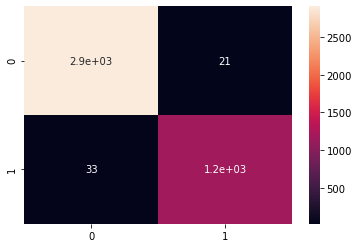

In [192]:
sns.heatmap(cm_train , annot = True)

<AxesSubplot:>

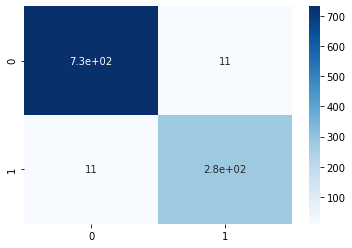

In [193]:
sns.heatmap(cm_test, annot = True,cmap='Blues')

In [194]:
#Test setinin doğruluk oranı
accuracy_score(Y_test , Y_pred_test)

0.978743961352657

In [195]:
#Eğitim setinin doğruluk oranı
accuracy_score(Y_train , Y_pred_train)

0.9869439071566731

In [196]:
print(classification_report(Y_pred_test, Y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.96      0.96      0.96       293

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



In [200]:
model = LogisticRegression()

In [201]:
# Lojistik Regresyon modelini eğitim verileriyle eğitmek 
model.fit(X_train, Y_train)

C:\Users\Burcu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [202]:

# eğitim verileriyle ilgili tahmin

prediction_on_training_data = model.predict(X_train)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [110]:

cm_train = confusion_matrix(Y_train , prediction_on_training_data)


<AxesSubplot:>

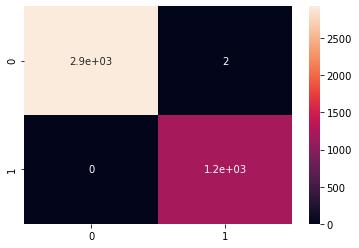

In [111]:
sns.heatmap(cm_train , annot = True)

In [205]:

print('Eğitim verilerinin doğruluğu : ', accuracy_on_training_data )


Eğitim verilerinin doğruluğu :  0.9995164410058027


In [113]:
# test verileriyle ilgili tahmin

prediction_on_test_data = model.predict(X_test)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [114]:
cm_test = confusion_matrix(Y_test, prediction_on_test_data)

<AxesSubplot:>

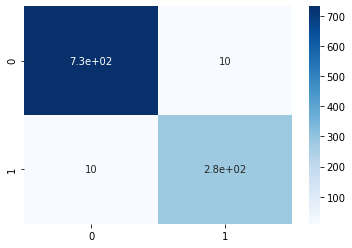

In [117]:
sns.heatmap(cm_test, annot = True,cmap='Blues')

In [206]:
print('Test verilerinin doğruluğ : ', accuracy_on_test_data)

Test verilerinin doğruluğ :  0.9806763285024155
